# Keras + Tensorflow implementation of handwritten digits recognition

Data from Kaggle Digit Recognition competition  
https://www.kaggle.com/c/digit-recognizer/data

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation

## Load data

In [19]:
train_file = '../data/train.csv'
test_file = '../data/test.csv'

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

In [20]:
train_df.head() # labels and pixels

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
test_df.head() # no labels here

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train_labels = train_df.label
train_images = train_df.iloc[:,1:]
test_images = test_df

## Show some digits from the input dataset

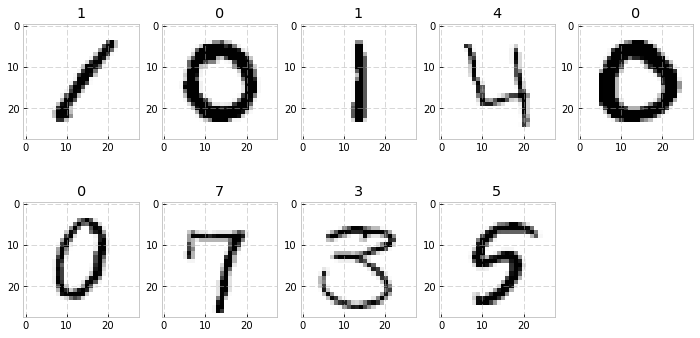

In [23]:
plt.figure(figsize=(12,6))
for i in range(0,9):
    plt.subplot(250 + (i+1))
    img = train_images.ix[i,:].values.reshape(28, 28)
    plt.imshow(img, cmap='Greys')
    plt.title(train_labels[i])

## Preprocess data for NN

In [24]:
train_images = (train_images/train_images.max()).fillna(0) # normalize values
test_images = (test_images/test_images.max()).fillna(0) # normalize values
train_labels = pd.get_dummies(train_labels) # one-hot encoding

In [25]:
train_labels.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


## Build simple 1-hidden layer dense NN
Some more information about Keras' Sequential models  
https://keras.io/getting-started/sequential-model-guide/

In [26]:
model = Sequential([
    Dense(32, input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

# Multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_6 (Dense)                  (None, 32)            25120       dense_input_4[0][0]              
____________________________________________________________________________________________________
activation_5 (Activation)        (None, 32)            0           dense_6[0][0]                    
____________________________________________________________________________________________________
dense_7 (Dense)                  (None, 10)            330         activation_5[0][0]               
____________________________________________________________________________________________________
activation_6 (Activation)        (None, 10)            0           dense_7[0][0]                    
Total params: 25450
_______________________________________________________________________

In [28]:
# import pydot
# from keras.utils.visualize_util import plot
# plot(model, to_file='model.png')

## Train the model

In [29]:
print(train_images.values.shape)
print(train_labels.values.shape)

(42000, 784)
(42000, 10)


In [30]:
history=model.fit(train_images.values, train_labels.values, validation_split = 0.05, 
            nb_epoch=25, batch_size=64)

Train on 39900 samples, validate on 2100 samples
Epoch 1/25
39900/39900 [==============================] - 2s - loss: 0.4734 - acc: 0.8721 - val_loss: 0.3233 - val_acc: 0.9086
Epoch 2/25
39900/39900 [==============================] - 2s - loss: 0.2492 - acc: 0.9283 - val_loss: 0.2601 - val_acc: 0.9248
Epoch 3/25
39900/39900 [==============================] - 2s - loss: 0.2024 - acc: 0.9426 - val_loss: 0.2275 - val_acc: 0.9352
Epoch 4/25
39900/39900 [==============================] - 2s - loss: 0.1721 - acc: 0.9504 - val_loss: 0.2060 - val_acc: 0.9433
Epoch 5/25
39900/39900 [==============================] - 3s - loss: 0.1525 - acc: 0.9558 - val_loss: 0.1905 - val_acc: 0.9457
Epoch 6/25
39900/39900 [==============================] - 2s - loss: 0.1368 - acc: 0.9603 - val_loss: 0.1842 - val_acc: 0.9448
Epoch 7/25
39900/39900 [==============================] - 2s - loss: 0.1260 - acc: 0.9637 - val_loss: 0.1723 - val_acc: 0.9486
Epoch 8/25
39900/39900 [==============================] - 4s -

In [31]:
hist_df = pd.DataFrame(history.history)

In [33]:
hist_df.head()

,acc,loss,val_acc,val_loss
0,0.872080,0.473382,0.908571,0.323336
1,0.928346,0.249190,0.924762,0.260108
2,0.942581,0.202409,0.935238,0.227455
3,0.950351,0.172102,0.943333,0.206049
4,0.955764,0.152544,0.945714,0.190517


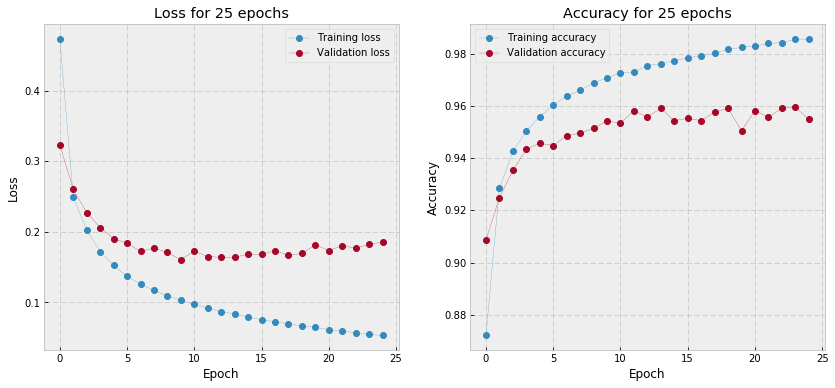

In [34]:
fig = plt.figure(figsize=(14,6))
plt.style.use('bmh')
params_dict = dict(linestyle='solid', linewidth=0.25, marker='o', markersize=6)

plt.subplot(121)
plt.plot(hist_df.loss, label='Training loss', **params_dict)
plt.plot(hist_df.val_loss, label='Validation loss', **params_dict)
plt.title('Loss for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(hist_df.acc, label='Training accuracy', **params_dict)
plt.plot(hist_df.val_acc, label='Validation accuracy', **params_dict)
plt.title('Accuracy for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [59]:
# Predict on the whole dataset now, 15 epochs
model = Sequential([
    Dense(32, input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

# Multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images.values, train_labels.values, nb_epoch=13, batch_size=64)

Epoch 1/13
42000/42000 [==============================] - 4s - loss: 0.4616 - acc: 0.8742     
Epoch 2/13
42000/42000 [==============================] - 4s - loss: 0.2464 - acc: 0.9299     
Epoch 3/13
42000/42000 [==============================] - 4s - loss: 0.1990 - acc: 0.9431     
Epoch 4/13
42000/42000 [==============================] - 4s - loss: 0.1695 - acc: 0.9503     
Epoch 5/13
42000/42000 [==============================] - 4s - loss: 0.1500 - acc: 0.9566     
Epoch 6/13
42000/42000 [==============================] - 3s - loss: 0.1341 - acc: 0.9604     
Epoch 7/13
42000/42000 [==============================] - 2s - loss: 0.1227 - acc: 0.9640     
Epoch 8/13
42000/42000 [==============================] - 2s - loss: 0.1125 - acc: 0.9674     
Epoch 9/13
42000/42000 [==============================] - 2s - loss: 0.1045 - acc: 0.9702     
Epoch 10/13
42000/42000 [==============================] - 2s - loss: 0.0967 - acc: 0.9715     
Epoch 11/13
42000/42000 [========================

## Predict test labels

In [60]:
pred_classes = model.predict_classes(test_images.values)

27872/28000 [============================>.] - ETA: 0s

In [61]:
pred_classes

array([2, 0, 9, ..., 3, 9, 2])

In [62]:
pred = pd.DataFrame({'ImageId': range(1, len(pred_classes)+1), 'Label': pred_classes})

In [63]:
pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,3


In [64]:
pred.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [65]:
pred.to_csv('../data/output/subm05.csv', index=False)